In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
irisDf = pd.read_csv(r"C:\Users\yug\Desktop\Projects\AIML\Training Regression Models\Linear Models\Logistic Regression\iris.csv")

X = irisDf["sepal_length"]
y = (irisDf["species"] == "setosa").astype(int)
X = np.array([X]).reshape(-1,1)
irisDf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A Logistic Regressor is a binary classifier that finds the probability of an sample belonging to one class or the other. It uses a logistic map ( A common one is 1/1+ e^-t) and is a sigmoid function.

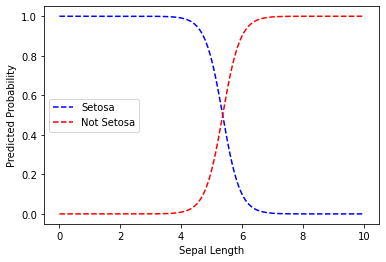

In [2]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X, y)

xTest = np.linspace(start=0,stop=10,num=1000).reshape(-1,1)
yProba = logReg.predict_proba(xTest) # Returns in order of labels.
# yProba[0] is the probability of the flower not being a Setosa and so on.

plt.plot(xTest, yProba[:, 1],"b--" ,label="Setosa")
plt.plot(xTest, yProba[:,0], "r--",label= "Not Setosa")
plt.xlabel("Sepal Length")
plt.ylabel("Predicted Probability")
plt.legend(loc="center left")
plt.show()

Using softmax regression, we can classify multiclass datasets without having to train many binary classifiers against each other.
Softmax regression computes a score k for each class k and then estimates the probability of of each class by applying the softmax function.
Note that the regressor is multiclass, not multioutput. So, we only get a single predicted class for each data point.

In [3]:
X = irisDf.iloc[:, 0:4]
y = irisDf.iloc[:, 4]
#X = np.array(X).reshape(-1,1)

xTrain = np.linspace(start=[0,0,0,0], stop=[10,7,5,4], num=1000)

In [4]:
softmaxLogReg = LogisticRegression(multi_class="multinomial")
softmaxLogReg.fit(X,y)
yPreds = softmaxLogReg.predict(xTrain)

yPreds = pd.DataFrame(yPreds)
predProba = softmaxLogReg.predict_proba(xTrain)

[[9.99529840e-01 4.70160104e-04 2.83919000e-10]
 [9.99523792e-01 4.76207409e-04 2.92735669e-10]
 [9.99517667e-01 4.82332459e-04 3.01826102e-10]
 ...
 [1.94392249e-04 3.14392364e-02 9.68366371e-01]
 [1.88642108e-04 3.09018649e-02 9.68909493e-01]
 [1.83060289e-04 3.03733849e-02 9.69443555e-01]]
